In [1]:
%load_ext autoreload
%autoreload 2
import precimed
import precimed.mixer
import logging
import numpy as np
#logging.getLogger().setLevel(logging.DEBUG)


In [2]:
libbgmg = precimed.mixer.LibBgmg('/home/oleksanf/github/mixer/src/build/lib/libbgmg.so')


In [2]:
libbgmg = precimed.mixer.LibBgmg('/home/oleksanf/github/mixer/src/build/lib/libbgmg.so')
libbgmg.init_log("/home/oleksanf/github/mixer/testlog5.log")
libbgmg.log_message('Test log message succeeded?')
libbgmg.dispose()
libbgmg.defvec=[0, 1, 0, 1, 1, 0, 1, 1]
libbgmg.mafvec = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
libbgmg.chrnumvec = [1, 1, 1, 2, 2, 2, 2, 2]
libbgmg.zvec1 = [-1.5, 1.5, 2.5, -2.5, 0.123]
libbgmg.zvec2 = [1.5, -1.5, -2.5, 2.5, 0.123]
libbgmg.nvec1 = [100, 200, 100, 200, 300]
libbgmg.nvec2 = [1000, 2000, 1000, 2000, 3000]
libbgmg.weights = [0.2, 0.2, 0.2, 0.3, 0.3]
print('num_snp: {}'.format(libbgmg.num_snp))
print('num_tag: {}'.format(libbgmg.num_tag))
print('defvec: {}'.format(libbgmg.defvec))
print('mafvec: {}'.format(libbgmg.mafvec))
print('chrnumvec: {}'.format(libbgmg.chrnumvec))
print('zvec1: {}'.format(libbgmg.zvec1))
print('zvec2: {}'.format(libbgmg.zvec2))
print('nvec1: {}'.format(libbgmg.nvec1))
print('nvec2: {}'.format(libbgmg.nvec2))
print('weights: {}'.format(libbgmg.weights))
libbgmg

num_snp: 8
num_tag: 5
defvec: [1 3 4 6 7]
mafvec: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]
chrnumvec: [1 1 1 2 2 2 2 2]
zvec1: [-1.5    1.5    2.5   -2.5    0.123]
zvec2: [ 1.5   -1.5   -2.5    2.5    0.123]
nvec1: [100. 200. 100. 200. 300.]
nvec2: [1000. 2000. 1000. 2000. 3000.]
weights: [0.2 0.2 0.2 0.3 0.3]


LibBgmg(_lib_name: /home/oleksanf/github/mixer/src/build/lib/libbgmg.so, _context_id: 0, num_snp: 8, num_tag: 5)

In [2]:
from importlib import reload
import precimed.mixer
reload(precimed.mixer)
libbgmg = precimed.mixer.LibBgmg('/home/oleksanf/github/mixer/src/build/lib/libbgmg.so')

libbgmg = precimed.mixer.LibBgmg('/home/oleksanf/github/mixer/src/build/lib/libbgmg.so')
libbgmg.init_log("/home/oleksanf/github/mixer/testlog5.log")
libbgmg.log_message('Test log message succeeded?')
libbgmg.dispose()

bim_file = '/home/oleksanf/vmshare/data/LDSR/1000G_EUR_Phase3_plink/1000G.EUR.QC.@.bim'
frq_file = '/home/oleksanf/vmshare/data/LDSR/1000G_EUR_Phase3_plink_freq/1000G.EUR.QC.@.frq'
plink_ld_bin = '/home/oleksanf/vmshare/data/LDSR/1000G_EUR_Phase3_plink/1000G.EUR.QC.@.p05_SNPwind50k.ld.bin'
chr_labels = list(range(1, 23))
trait1_file = '/home/oleksanf/vmshare/data/MMIL/SUMSTAT/TMP/ldsr/PGC_SCZ_2014_EUR.sumstats.gz'
trait2_file = '/home/oleksanf/vmshare/data/MMIL/SUMSTAT/TMP/ldsr/PGC_BIP_2016.sumstats.gz'
exclude = ''; extract = ''
libbgmg.init(bim_file, frq_file, chr_labels, trait1_file, trait2_file, exclude, extract);
print(libbgmg)

options=[('r2min', 0.05), ('kmax', 100), ('max_causals', 0.03*libbgmg.num_snp), ('num_components', 3), 
         ('cache_tag_r2sum', False), ('threads', 6), ('seed', None), ('z1max', None)]
for opt, val in options: libbgmg.set_option(opt, val)

for chr_label in chr_labels: 
    libbgmg.set_ld_r2_coo_from_file(plink_ld_bin.replace('@', str(chr_label)))
    libbgmg.set_ld_r2_csr(chr_label);

randprune_n = 64
randprune_r2 = 0.1
libbgmg.set_weights_randprune(randprune_n, randprune_r2);

libbgmg.set_option('diag', 0)

LibBgmg(_lib_name: /home/oleksanf/github/mixer/src/build/lib/libbgmg.so, _context_id: 0, num_snp: 9997231, num_tag: 1091550)


0

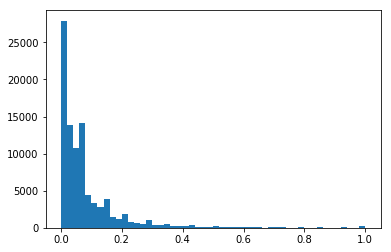

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(libbgmg.weights,bins=50);

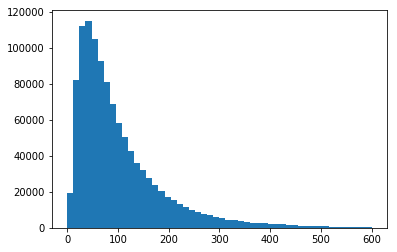

In [30]:
plt.hist(libbgmg.ld_tag_r2_sum, range=(0, 600), bins=50);

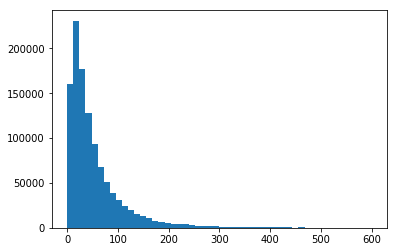

In [31]:
plt.hist(libbgmg.ld_tag_r4_sum, range=(0, 600), bins=50);

In [45]:
# it's possible to look at LD of a given SNP, and of the entire chromosome
for i in range(1,100):
    tag, r2 = libbgmg.get_ld_r2_snp(i)
    if len(tag>0):
        print(len(tag), list(zip(tag,r2)))
snp, tag, r2 = libbgmg.get_ld_r2_chr(21)

1 [(3450, 0.050812542)]
2 [(1627, 0.067566946), (1635, 0.065918975)]
4 [(2125, 0.05070573), (2128, 0.053543907), (4458, 0.05900664), (4465, 0.05159075)]
1 [(975, 0.06755169)]
1 [(975, 0.069092855)]
1 [(975, 0.069092855)]
12 [(1969, 0.05009537), (1971, 0.052048523), (3543, 0.051438164), (3579, 0.051819637), (3582, 0.051819637), (3585, 0.051544975), (3586, 0.0520943), (3589, 0.05168231), (3590, 0.05195697), (3591, 0.051422905), (3592, 0.052643627), (3594, 0.052109558)]


In [3]:
for i in range(1,100): libbgmg.calc_univariate_cost(1, 0.003, 1.2, 1e-4)

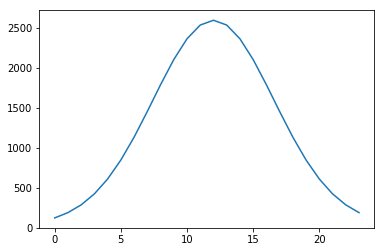

In [6]:
pdf=libbgmg.calc_univariate_pdf(1, 0.003, 1.2, 1e-4, np.arange(-3,3,0.25))
plt.plot(pdf);

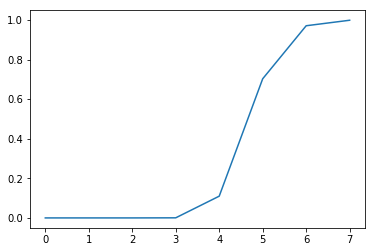

In [7]:
svec=libbgmg.calc_univariate_power(1, 0.003, 1.2, 1e-4, 5.45, [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8])
plt.plot(svec)

In [3]:
c0,c1,c2=libbgmg.calc_univariate_delta_posterior(1, 0.003, 1.2, 1e-4)


RuntimeError: Disable calc_univariate_delta_posterior - for some reason it crashes in native c++ plugin

In [ ]:
out_file = '/home/oleksanf/github/mixer/results'
lib_name = '/home/oleksanf/github/mixer/src/build/lib/libbgmg.so'
log_file = out_file + '.log'
bim_file = '/home/oleksanf/vmshare/data/LDSR/1000G_EUR_Phase3_plink/1000G.EUR.QC.@.bim'
frq_file = '/home/oleksanf/vmshare/data/LDSR/1000G_EUR_Phase3_plink_freq/1000G.EUR.QC.@.frq'
plink_ld_bin = '/home/oleksanf/vmshare/data/LDSR/1000G_EUR_Phase3_plink/1000G.EUR.QC.@.p05_SNPwind50k.ld.bin'
chr_labels = list(range(1, 23))
trait1_file = '/home/oleksanf/vmshare/data/MMIL/SUMSTAT/TMP/ldsr/PGC_SCZ_2014_EUR.sumstats.gz'
trait2_file = '/home/oleksanf/vmshare/data/MMIL/SUMSTAT/TMP/ldsr/PGC_BIP_2016.sumstats.gz'
exclude = ''; extract = ''
    options=[('r2min', 0.05), ('kmax', 100), ('max_causals', 0.03*libbgmg.num_snp), ('num_components', 3), 
             ('cache_tag_r2sum', False), ('threads', 6), ('seed', 123), ('z1max', None), ('z2max', None)]
randprune_n = 64
randprune_r2 = 0.1

def setub_libbgmg(lib_name, log_file, bim_file, frq_file, plink_ld_bin, chr_labels,
                  trait1_file, trait2_file, exclude, extract,
                  options, randprune_n, randprune_r2):

    libbgmg = precimed.mixer.LibBgmg(lib_name)
    libbgmg.init_log(log_file)
    libbgmg.dispose()

    libbgmg.init(bim_file, frq_file, chr_labels, trait1_file, trait2_file, exclude, extract);

    for opt, val in options:
        libbgmg.set_option(opt, val)

    for chr_label in chr_labels: 
        libbgmg.set_ld_r2_coo_from_file(plink_ld_bin.replace('@', str(chr_label)))
        libbgmg.set_ld_r2_csr(chr_label);

    libbgmg.set_weights_randprune(randprune_n, randprune_r2);

    libbgmg.set_option('diag', 0)
    return libbgmg

In [ ]:
def run_mixer(lib):


In [157]:
x=scipy.optimize.minimize_scalar(lambda x:(x-1)*(x-1),  method='brent', bracket=[-10, 10])
print(x)
print(type(x))

     fun: 4.930380657631324e-32
    nfev: 9
     nit: 5
 success: True
       x: 1.0000000000000002
<class 'scipy.optimize.optimize.OptimizeResult'>


In [236]:
from importlib import reload
import precimed.mixer
reload(precimed.mixer)
from precimed.mixer.utils import *
from precimed.mixer.utils import UnivariateParams
from precimed.mixer.utils import BivariateParams
from precimed.mixer.utils import _log_exp_converter
from precimed.mixer.utils import _logit_logistic_converter
from precimed.mixer.utils import _arctanh_tanh_converter
from precimed.mixer.utils import UnivariateParametrization_constPI
from precimed.mixer.utils import UnivariateParametrization_constH2_constSIG2ZERO
from precimed.mixer.utils import UnivariateParametrization_constPI_constSIG2BETA
from precimed.mixer.utils import UnivariateParametrization
from precimed.mixer.utils import BivariateParametrization_constUNIVARIATE_constRG_constRHOZERO
from precimed.mixer.utils import BivariateParametrization_constUNIVARIATE_constRG_constRHOZERO_boundedPI
from precimed.mixer.utils import BivariateParametrization_constSIG2BETA_constSIG2ZERO_infPI_maxRG
from precimed.mixer.utils import BivariateParametrization_constUNIVARIATE
from precimed.mixer.utils import BivariateParametrization_constUNIVARIATE_natural_axis
from precimed.mixer.utils import BivariateParametrization_constUNIVARIATE_constRHOBETA_constPI
from precimed.mixer.utils import _hessian_robust
from precimed.mixer.utils import _max_rg
from precimed.mixer.utils import _calculate_univariate_uncertainty
from precimed.mixer.utils import _calculate_bivariate_uncertainty

print(UnivariateParams(0.001, 1e-4, 1.23).cost(libbgmg, 1))
print(UnivariateParams(0.001, 1e-4, 1.23).cost(libbgmg, 2))
print(BivariateParams([0.001, 0.002, 0.004], [1e-4, 3e-4], 0.8, [1.23, 1.06], 0.4).cost(libbgmg))

#scalar_optimizer = scipy.optimize.fminbound
params12_fitted, _ = BivariateParametrization_constUNIVARIATE_constRG_constRHOZERO_boundedPI(
    const_params1=params[0],
    const_params2=params[1],
    const_rg=params12._rg(),
    const_rho_zero=params12._rho_zero,
    lib=libbgmg).fit(scalar_optimizer)
print(params12_fitted)

143039.9667054704
136117.94951642904
279813.56074795313
BivariateParams(_pi: [0.0012466754854858091, 0.0003354573743336747, 0.0028265604933306715], _sig2_beta: [5.288619957821589e-05, 5.231128193651721e-05], _rho_beta: 0.8945159908412117, _sig2_zero: [1.1755915719572747, 1.084084668490775], _rho_zero: 0.26921714348165393, rg: 0.7045218190412361)


In [85]:
import scipy.optimize

libbgmg.set_option('fast_cost', 1);
    
optimizer = lambda func, x0: scipy.optimize.minimize(func, x0, method='Nelder-Mead')

params = []

for trait in [1, 2]:
    params0, details = UnivariateParametrization_constPI(1.0, 1.5, 1e-4, libbgmg, trait=trait).fit(optimizer)
    #print(params0)

    params1, details = UnivariateParametrization_constH2_constSIG2ZERO(0.01, params0, libbgmg, trait=trait).fit(optimizer)
    #print(params1)

    params2, details = UnivariateParametrization_constPI_constSIG2BETA(1.0, params1, libbgmg, trait=trait).fit(optimizer)
    #print(params2)

    params3, details = UnivariateParametrization(params2, libbgmg, trait=trait).fit(optimizer)
    print(params3)
    
    params.append(params3)

alpha = 0.05
totalhet = 2.0 * np.dot(libbgmg.mafvec, 1.0 - libbgmg.mafvec) 
num_samples = 10000

# That's the most appropriate initialization for the bivariate model
# BivariateParametrization_constSIG2BETA_constSIG2ZERO_infPI_maxRG - not used
# BivariateParametrization_constUNIVARIATE_constRG_constRHOZERO    - used to fit the full model
zcorr = np.corrcoef(libbgmg.zvec1, libbgmg.zvec2)[0, 1]
params12, details = BivariateParametrization_constUNIVARIATE(
    const_params1=params[0],
    const_params2=params[1],
    init_pi12=min(params[0]._pi, params[1]._pi)*0.1,
    init_rho_beta=zcorr,
    init_rho_zero=zcorr,
    lib=libbgmg).fit(optimizer)
print(params12)

ci1, ci_sample1 = _calculate_univariate_uncertainty(UnivariateParametrization(params[0], libbgmg, trait=1), alpha, totalhet, libbgmg.num_snp, num_samples)
ci2, ci_sample2 = _calculate_univariate_uncertainty(UnivariateParametrization(params[1], libbgmg, trait=2), alpha, totalhet, libbgmg.num_snp, num_samples)
ci12, ci_sample12 = _calculate_bivariate_uncertainty(BivariateParametrization_constUNIVARIATE(
    const_params1=params[0],
    const_params2=params[1],
    init_pi12=params12._pi[2],
    init_rho_beta=params12._rho_beta,
    init_rho_zero=params12._rho_zero,
    lib=libbgmg), [ci_sample1, ci_sample2], alpha, totalhet, libbgmg.num_snp, num_samples)

print('\nUnivariate (trait1):')
for k, v in ci1.items():
        print('{}: pe={:.3g}, mean={:.3g}, median={:.3g}, std={:.3g}, ci=[{:.3g}, {:.3g}]'.format(k, v['point_estimate'], v['mean'], v['median'], v['std'], v['lower'], v['upper']))
print('\nUnivariate (trait2):')
for k, v in ci2.items():
        print('{}: pe={:.3g}, mean={:.3g}, median={:.3g}, std={:.3g}, ci=[{:.3g}, {:.3g}]'.format(k, v['point_estimate'], v['mean'], v['median'], v['std'], v['lower'], v['upper']))
print('\nBivariate:')
for k, v in ci12.items():
        print('{}: pe={:.3g}, mean={:.3g}, median={:.3g}, std={:.3g}, ci=[{:.3g}, {:.3g}]'.format(k, v['point_estimate'], v['mean'], v['median'], v['std'], v['lower'], v['upper']))

UnivariateParams(_pi: 0.004073235978816481, _sig2_beta: 5.288619957821589e-05, _sig2_zero: 1.1755915719572747)
UnivariateParams(_pi: 0.0031620178676643462, _sig2_beta: 5.231128193651721e-05, _sig2_zero: 1.084084668490775)
BivariateParams(_pi: [0.0012449932750385182, 0.00033377516388638376, 0.0028282427037779625], _sig2_beta: [5.288619957821589e-05, 5.231128193651721e-05], _rho_beta: 0.8939839416846624, _sig2_zero: [1.1755915719572747, 1.084084668490775], _rho_zero: 0.26921714348165393, rg: 0.7045218190412361)

Univariate (trait1):
pi: pe=0.00407, mean=0.0041, median=0.0041, std=0.000453, ci=[0.00329, 0.00506]
nc: pe=4.07e+04, mean=4.1e+04, median=4.1e+04, std=4.53e+03, ci=[3.29e+04, 5.06e+04]
nc@p9: pe=9.2e+03, mean=9.26e+03, median=9.26e+03, std=1.02e+03, ci=[7.43e+03, 1.14e+04]
sig2_beta: pe=5.29e-05, mean=5.32e-05, median=5.32e-05, std=5.34e-06, ci=[4.34e-05, 6.44e-05]
sig2_zero: pe=1.18, mean=1.18, median=1.18, std=0.00889, ci=[1.16, 1.19]
h2: pe=0.447, mean=0.447, median=0.447, st

In [144]:
# That's the most appropriate initialization for the bivariate model
# BivariateParametrization_constSIG2BETA_constSIG2ZERO_infPI_maxRG - not used
# BivariateParametrization_constUNIVARIATE_constRG_constRHOZERO    - used to fit the full model
zcorr = np.corrcoef(libbgmg.zvec1, libbgmg.zvec2)[0, 1]
params12, details = BivariateParametrization_constUNIVARIATE(
    const_params1=params[0],
    const_params2=params[1],
    init_pi12=min(params[0]._pi, params[1]._pi)*0.1,
    init_rho_beta=zcorr,
    init_rho_zero=zcorr,
    lib=libbgmg).fit(optimizer)
print(params12)

BivariateParams(_pi: [0.0012449932750385182, 0.00033377516388638376, 0.0028282427037779625], _sig2_beta: [5.288619957821589e-05, 5.231128193651721e-05], _rho_beta: 0.8939839416846624, _sig2_zero: [1.1755915719572747, 1.084084668490775], _rho_zero: 0.26921714348165393, rg: 0.7045218190412361)


In [18]:
params12, details = BivariateParametrization_constSIG2BETA_constSIG2ZERO_infPI_maxRG(
    const_sig2_beta=[p._sig2_beta for p in params],
    const_sig2_zero=[p._sig2_zero for p in params],
    max_rg=_max_rg(params[0]._pi, params[1]._pi),
    init_rho_beta=0.5, init_rho_zero=0.1, lib=libbgmg).fit(optimizer)
print(params12)

params12, details = BivariateParametrization_constUNIVARIATE_constRG_constRHOZERO(
    const_params1=params[0],
    const_params2=params[1],
    const_rg=params12._rho_beta,
    const_rho_zero=params12._rho_zero,
    init_pi12=min(params[0]._pi, params[1]._pi)*0.95,
    lib=libbgmg).fit(optimizer)
print(params12)

params12, details = BivariateParametrization_constUNIVARIATE(
    const_params1=params[0],
    const_params2=params[1],
    init_pi12=min(params[0]._pi, params[1]._pi)*0.5,
    init_rho_beta=0,
    init_rho_zero=0,
    lib=libbgmg).fit(optimizer)
print(params12)

params12, details = BivariateParametrization_constUNIVARIATE_constRHOBETA_constPI(
    const_params1=params[0],
    const_params2=params[1],
    const_pi12=params12._pi[2],
    const_rho_beta=params12._rho_beta,
    init_rho_zero=0,
    lib=libbgmg).fit(optimizer)
print(params12)

BivariateParams(_pi: [0, 0, 1], _sig2_beta: [5.288619957821589e-05, 5.231128193651721e-05], _rho_beta: 0.8810739768325555, _sig2_zero: [1.1755915719572747, 1.084084668490775], _rho_zero: 0.8528486201057031, rg: 0.8810739768325555)
BivariateParams(_pi: [0.0015524944994159688, 0.0006412763882638344, 0.002520741479400512], _sig2_beta: [5.288619957821589e-05, 5.231128193651721e-05], _rho_beta: 1.0, _sig2_zero: [1.1755915719572747, 1.084084668490775], _rho_zero: 0.27, rg: 0.7023868342220096)
BivariateParams(_pi: [0.0015403841166866214, 0.0006291660055344869, 0.0025328518621298593], _sig2_beta: [5.288619957821589e-05, 5.231128193651721e-05], _rho_beta: 0.9999999995949107, _sig2_zero: [1.1755915719572747, 1.084084668490775], _rho_zero: 0.2690626563807834, rg: 0.7057613066680437)
BivariateParams(_pi: [0.0015403841166866214, 0.0006291660055344869, 0.0025328518621298593], _sig2_beta: [5.288619957821589e-05, 5.231128193651721e-05], _rho_beta: 0.9999999995949107, _sig2_zero: [1.1755915719572747, 1

In [239]:
params12, details = BivariateParametrization_constUNIVARIATE_natural_axis(
    const_params1=params[0],
    const_params2=params[1],
    init_pi12=min(params[0]._pi, params[1]._pi)*0.5,
    init_rho_beta=0,
    init_rho_zero=0,
    lib=libbgmg).fit(optimizer)
print(params12)

BivariateParams(_pi: [0.0012389994058291652, 0.0003277812946770307, 0.0028342365729873155], _sig2_beta: [5.288619957821589e-05, 5.231128193651721e-05], _rho_beta: 0.8928580429674069, _sig2_zero: [1.1755915719572747, 1.084084668490775], _rho_zero: 0.26906143314603836, rg: 0.7051257384792755)
